In [106]:
import uproot
import numpy as np
import os
liczba = os.popen('cd traning/bkg; find -type f | wc -l').read()
liczba2 = int(liczba)

In [107]:
import glob
file_pattern = "traning/bkg/*.root"
files = glob.glob(file_pattern)

In [108]:
branch_list = [uproot.open(files[i])['nominal'].arrays(library="np") for i in range (liczba2) ]
signal = branch_list[-1]

In [109]:
combined_data = {}

In [110]:
def delete_branches(branches):
    del branches['jet_isbtagged_DL1r_77']
    del branches['mc_kFactor']
    del branches['RunYear']
    del branches['mc_rawXSection']
    del branches['lep_ID_0']
    del branches['p_Event_No']
    del branches['jet_pt']
    del branches['jet_eta']
    del branches['jet_phi']
    del branches['jet_e']
    del branches['lep_vz_0']
    del branches['lep_vz_1']
    del branches['taus_DL1r_0']
    del branches['p_sumElepAll_EJet']
    del branches['p_sumPtleptauAll_Ptjet']

In [111]:
for i in branch_list:
    delete_branches(i)


In [112]:
keys = list(branch_list[0])

In [113]:
def join_branchKey(arr):
    combo = arr
    if len(arr) > 1:
        combo = np.concatenate([arr[0], arr[1]])
        for i in range(len(arr)):
            combo = np.concatenate([combo, arr[i]])
    return combo

In [114]:
def join_branch(branch):
    for key in keys:
        if all(isinstance(item, np.ndarray) for item in branch[key]):
            branch[key] = join_branchKey(branch[key])
    return branch

In [115]:
for i in range(len(branch_list)):
    branch_list[i] = join_branch(branch_list[i])

In [116]:
combined_data

{}

In [117]:
for i in keys:
    combo = np.concatenate([branch_list[0][i], np.array([])])
    for k in branch_list:
        combo = np.concatenate([combo, k[i]])
    combined_data[i] = combo
    try:
        combined_data[i] = combined_data[i].astype(np.float32)
    except ValueError:
        print(i)

In [118]:
"""def join_signal_bkg(signal_branches, bkg_branches):
    branch_list_all = {}
    
    for k in keys:
        
        branch_list_all[k] = np.concatenate([signal_branches[k], bkg_branches[k]])
        branch_list_all[k] = branch_list_all[k].astype(np.float32)
        
    return branch_list_all"""

'def join_signal_bkg(signal_branches, bkg_branches):\n    branch_list_all = {}\n    \n    for k in keys:\n        \n        branch_list_all[k] = np.concatenate([signal_branches[k], bkg_branches[k]])\n        branch_list_all[k] = branch_list_all[k].astype(np.float32)\n        \n    return branch_list_all'

In [119]:
combined_data = join_branch(combined_data)

In [120]:
for key in keys:
    print(len(combined_data[key]))

75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
7582

In [121]:
def minus_value_filter(keys, branch):
    try:
        for key in keys:
            min = np.min(branch[key])
            max = np.max(branch[key])
            distance = abs(max - min)
            for i in range(len(branch[key])):
                branch[key][i] = branch[key][i] + distance
        return branch
    except ValueError:
        print(key)

In [122]:
combined_data = minus_value_filter(keys, combined_data)


In [123]:
combined_data[keys[0]]

array([80350024., 80292096., 80293256., ..., 80455176., 80342640.,
       80333280.], dtype=float32)

In [124]:
def norm(keys, branch):
    
    maxes = {}
    mins = {}
    
    for key in keys:
        max = np.max(branch[key])
        min = np.min(branch[key])
        
        
        for i in range(len(branch[key])):
            if max != 0:
                branch[key][i] = branch[key][i] / max
        if(max != 0):
            maxes[key] = max / max    
            mins[key] = min / max
        
        
    return [branch, maxes, mins]

In [125]:
from sklearn import preprocessing

def new_norm(keys, branch):
    
    for key in keys:
        branch[key] = preprocessing.normalize(branch[key].reshape(1, -1))
        branch[key] = branch[key].T
        
    return branch

In [126]:
combined_data = new_norm(keys, combined_data)

In [134]:
for key in keys:
    print(len(combined_data[key]))

75822
75822
75824
75824
75824
75824
75497
75768
75821
75423
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75412
75820
75824
75824
75824
75824
75824
75824
75824
75453
75434
75824
75824
75824
75824
75530
75738
75813
75423
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75366
75819
75824
75824
75824
75824
75824
75824
75497
75824
75824
75824
75414
75824
75268
75824
75824
75824
75824
75478
75822
75824
75824
75824
75824
75824
75824
75798
75808
75822
75456
75439
75824
75824
75398
75472
75824
75824
75373
75523
75824
75824
75824
75824
75824
75824
75824
75824
75519
75447
75364
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75445
75456
75482
75488
75822
75824
75824
75824
75552
75455
75824
75824
75824
75487
75824
75824
75824
75824
75456
75561
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75530
75824
75824
75504
75822
75822
75462
75468
75499
75516
75516
75808
75824
75824
75824
75797
7582

In [135]:
import matplotlib.pyplot as plt

In [136]:
def bins(n, list):
    bins = []
    
    list = sorted(list)
    
    last = list[-1]
    k = np.min(list)
    while k < last:
        bins.append(k)
        k += (last - list[0])/n
    
    
    return bins

In [137]:
def cuting(list):
    mean = np.mean(list)
    std = np.std(list)
    
    filtred = []
    
    max_list = []
    min_list = []
    
    max_plus = mean + 5*std
    max_minus = mean - 5*std
    for i in range(len(list)):
        if(list[i] <= max_plus and list[i] >= max_minus):
            filtred.append(list[i])
        elif (list[i] >= max_plus):
          max_list.append(list[i])
        elif (list[i] <= max_minus):
            min_list.append(list[i])
    if (len(max_list) > 0):
        cut_max = np.min(max_list)
    else:
        cut_max = np.max(filtred)
    if(len(min_list) > 0):
        cut_min = np.max(min_list)
    else:
        cut_min = np.min(filtred)
    
    
    return [np.array(filtred), cut_max, cut_min]

In [138]:
globals_max = {}
globals_min = {}

for key in keys:
    try:
        cut = cuting(combined_data[key])
        combined_data[key] = cut[0]
        globals_max[key] = cut[1]
        globals_min[key] = cut[2]
    except ValueError:
        print(key)

In [147]:
for key in keys:
    print(len(combined_data[key]))

75431
75402
75824
75824
75824
75824
75388
75388
75821
75205
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
74825
75819
75824
75824
75824
75824
75824
75824
75824
75190
75213
75824
75824
75824
75824
75429
75425
75813
75185
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
74787
75818
75824
75824
75824
75824
75824
75824
75310
75824
75824
75824
75185
75824
74800
75824
75824
75824
75824
75245
75412
75824
75824
75824
75824
75824
75824
75798
75450
75445
75237
75224
75824
75824
75133
75186
75824
75824
75014
75505
75824
75824
75824
75824
75824
75824
75824
75824
75336
75201
74997
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75208
75234
75313
75323
75822
75824
75824
75824
75454
75057
75824
75824
75824
75301
75824
75824
75824
75824
75257
75459
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75824
75401
75824
75824
75357
75410
75446
75276
75281
75283
75368
75368
75690
75824
75824
75824
75796
7582

In [185]:
def paint(key, m, lst, lst2, color, color2, alpha):
    fig = plt.figure()
    biny = bins(m, lst[key])
    plt.hist(lst[key], bins=biny, color=color)
    plt.hist(lst2[key], bins=biny, color=color2, alpha=alpha)
    plt.title(key)
    return fig

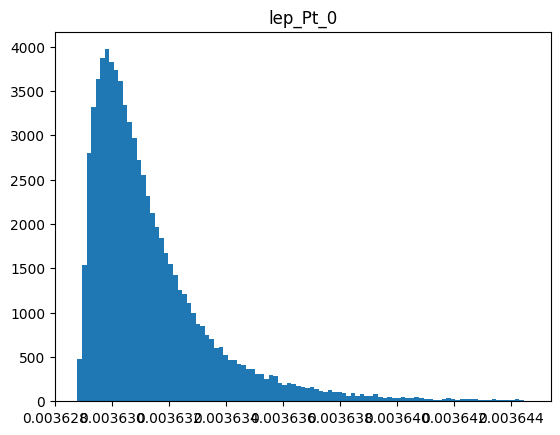

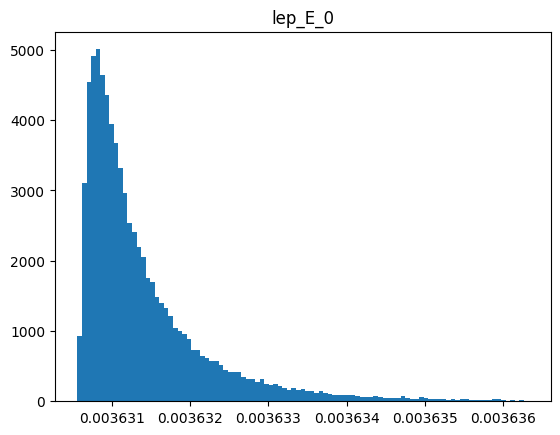

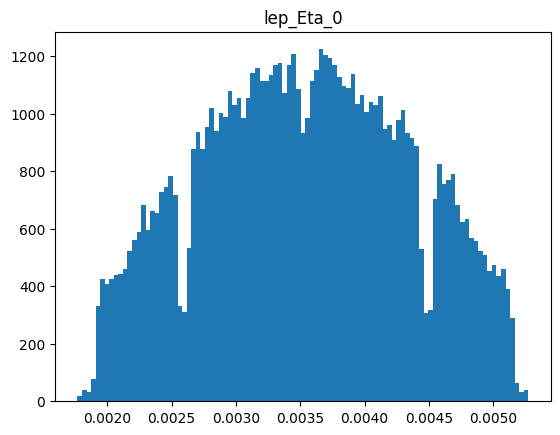

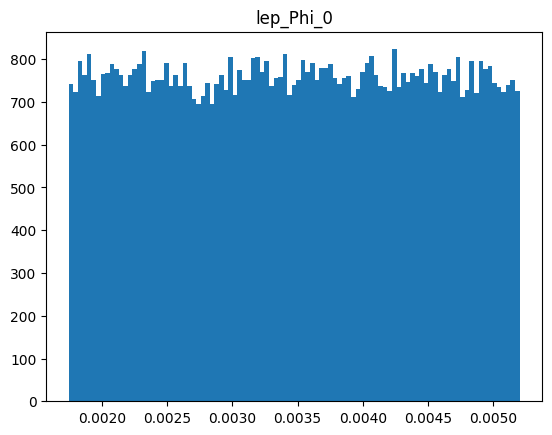

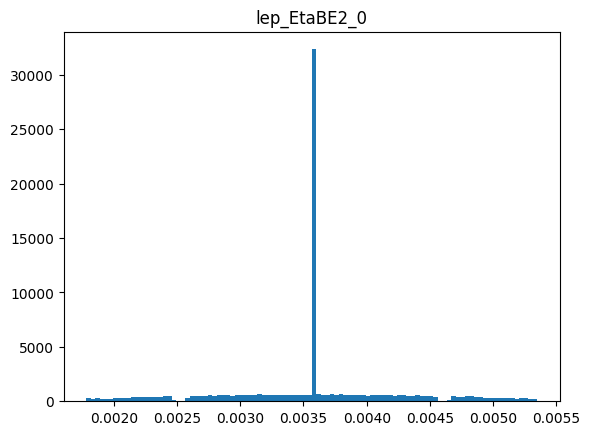

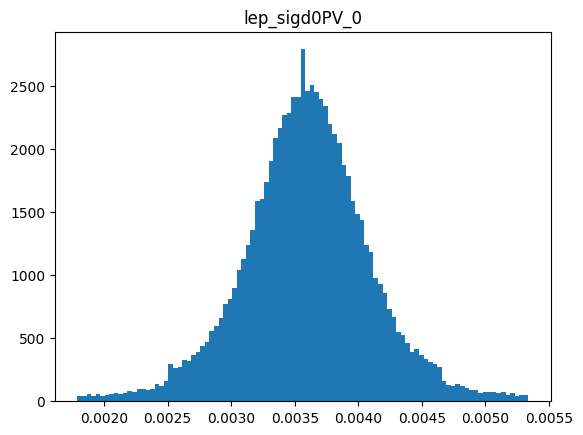

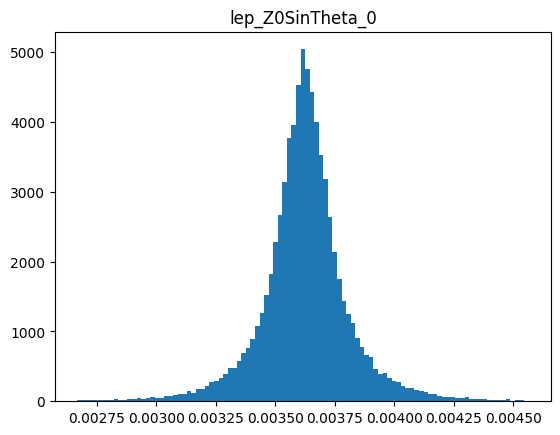

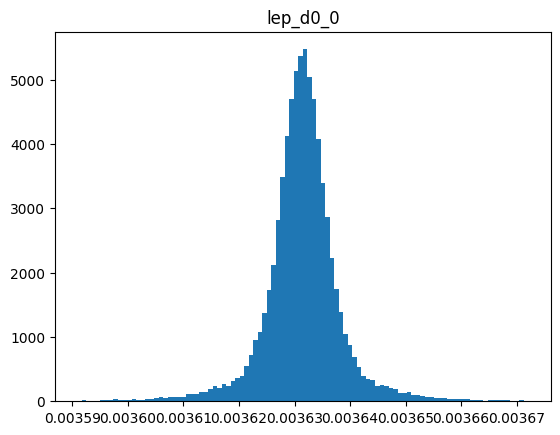

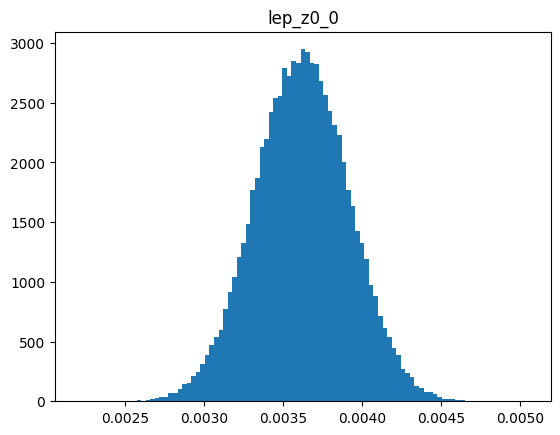

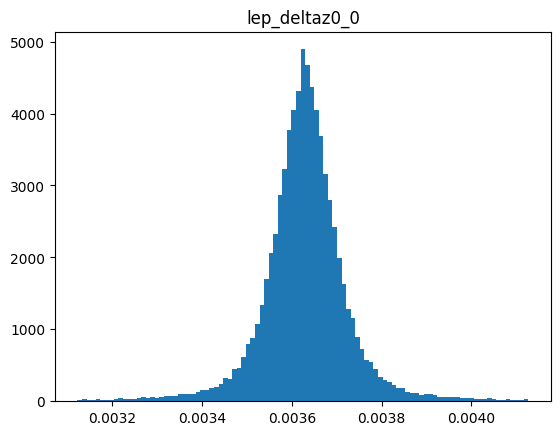

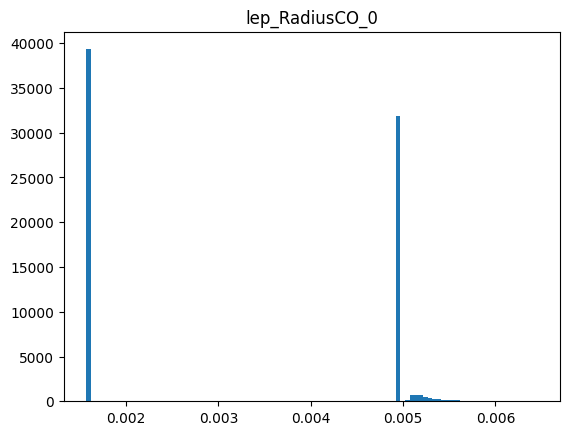

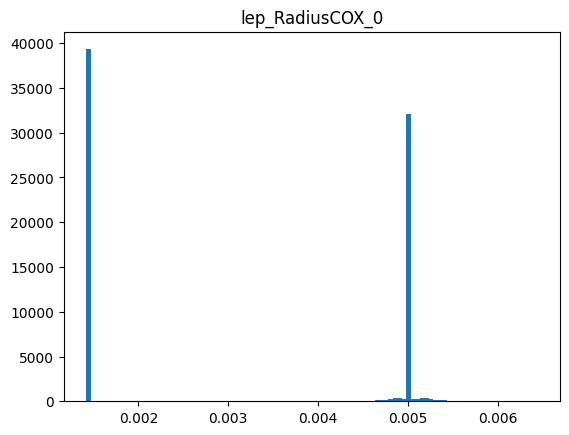

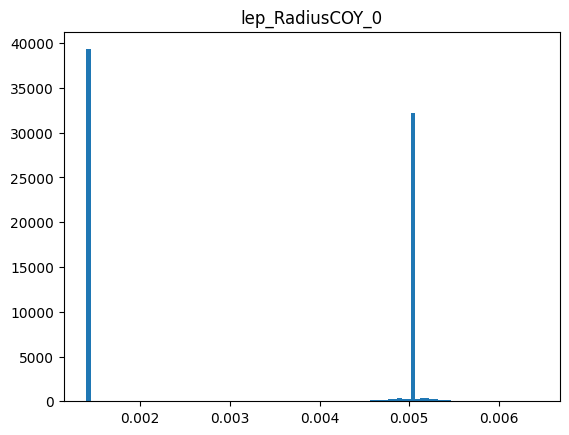

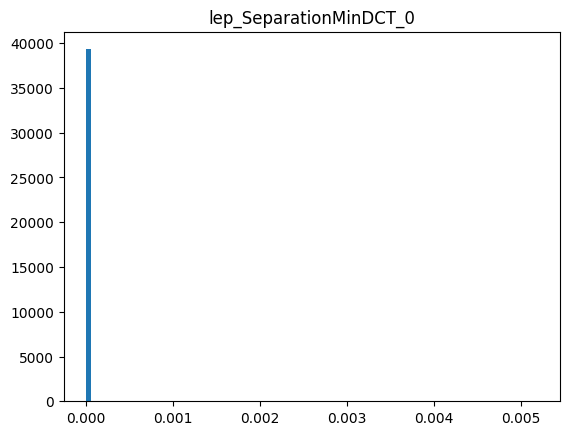

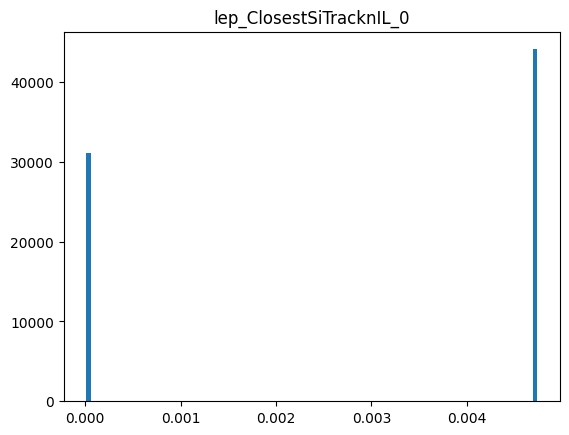

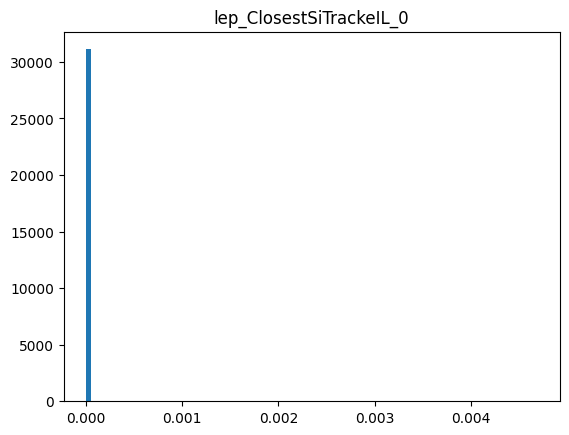

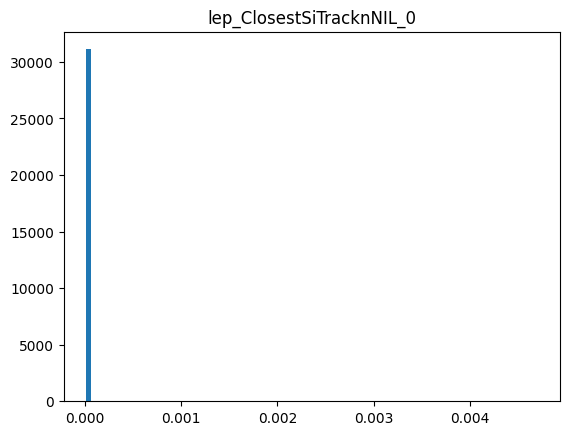

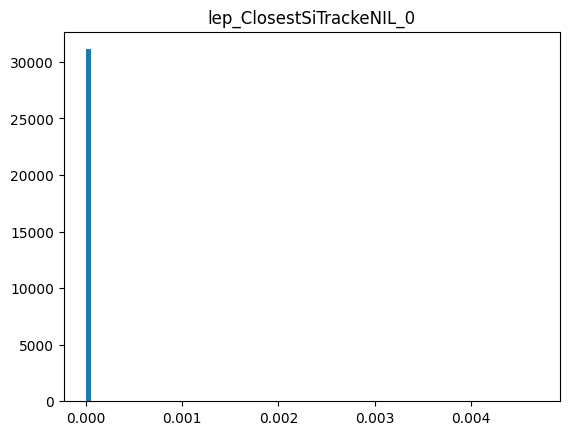

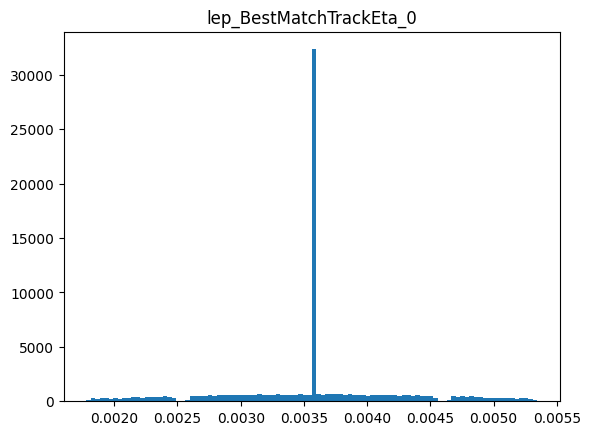

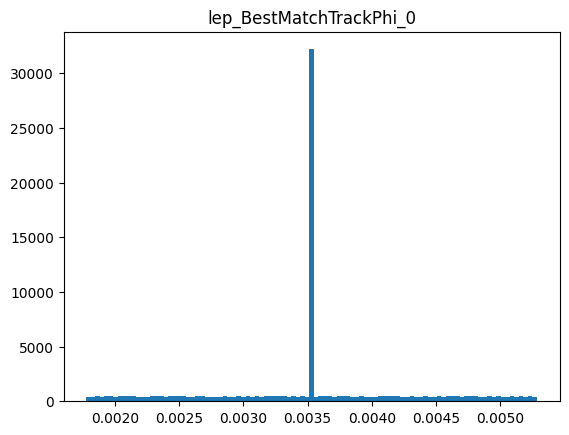

In [157]:
for i in range(0, 20):
    paint(keys[i], 100, background[keys[i]], )

In [156]:
combined_data = join_branch(combined_data)

In [169]:
signal = branch_list[-1]
background = {}
for key in keys:
    for i in range(len(signal[key])):
        signal[key][i] = combined_data[key][len(combined_data[key]) - len(signal[key]) + i]
        
    background[key] = combined_data[key][:len(combined_data[key]) - len(signal[key])]

In [176]:
signal[keys[0]]

array([0.00363055, 0.00362986, 0.00363123, ..., 0.00363676, 0.00363167,
       0.00363125], dtype=float32)

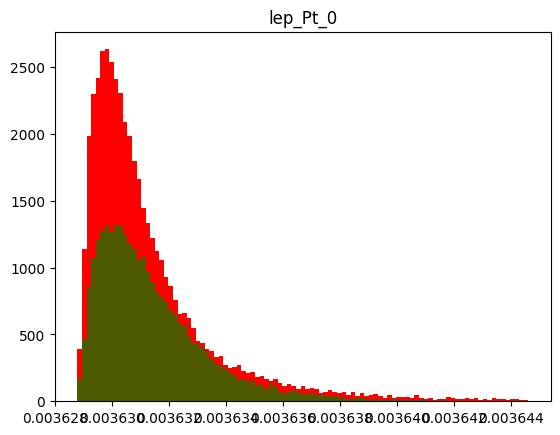

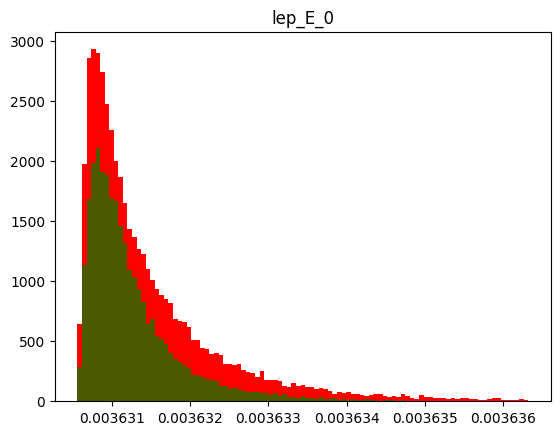

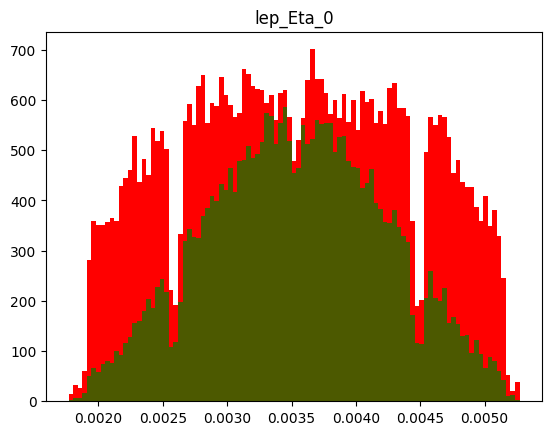

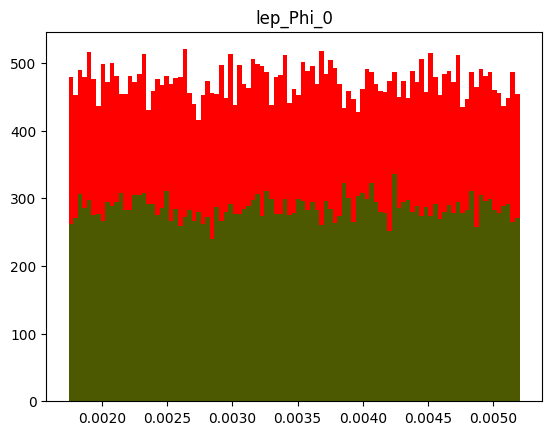

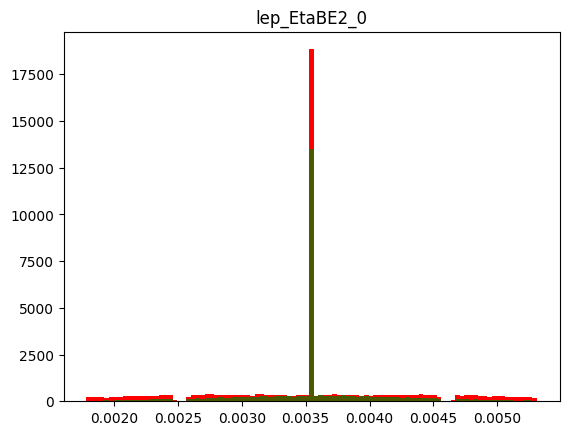

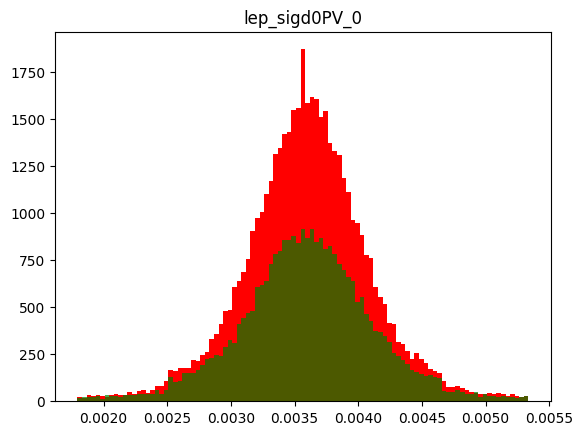

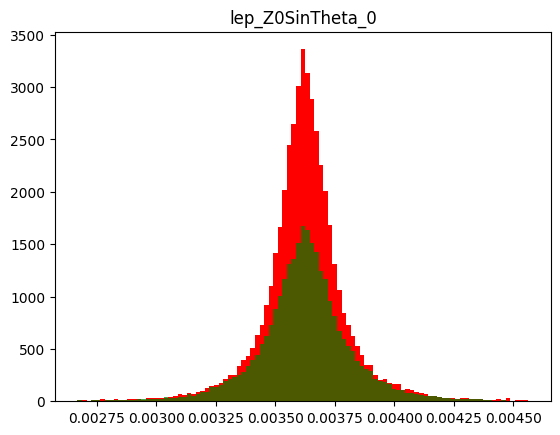

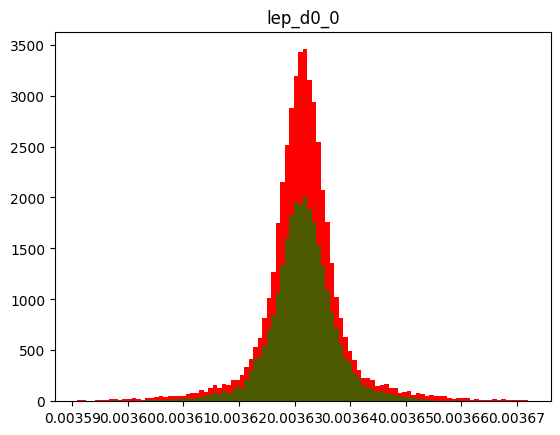

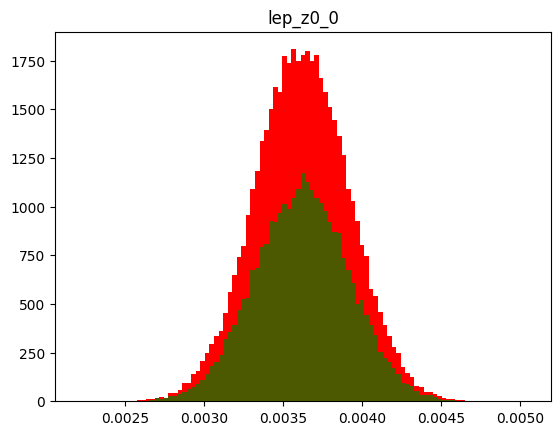

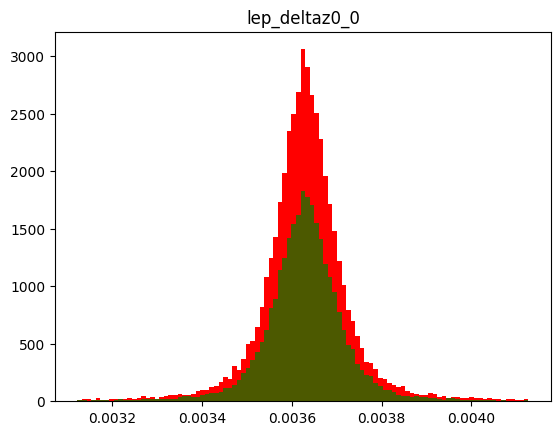

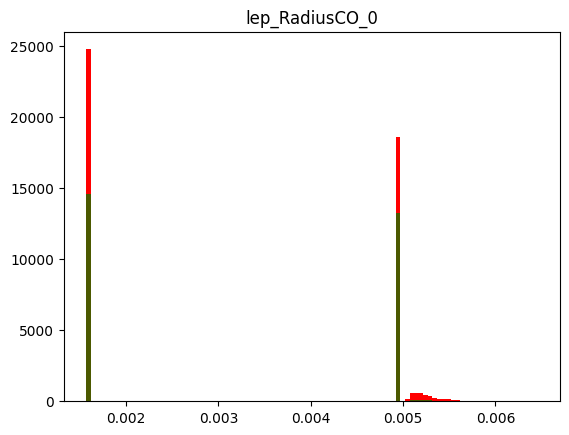

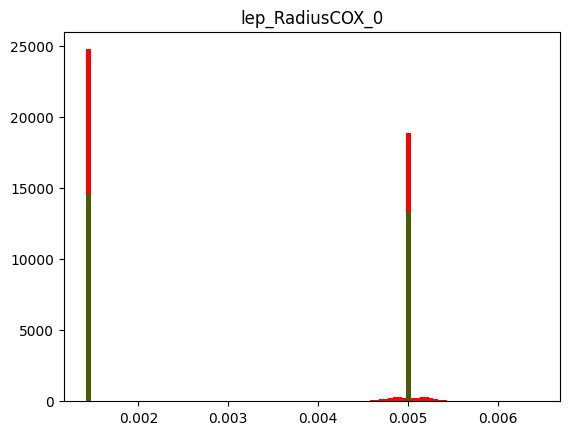

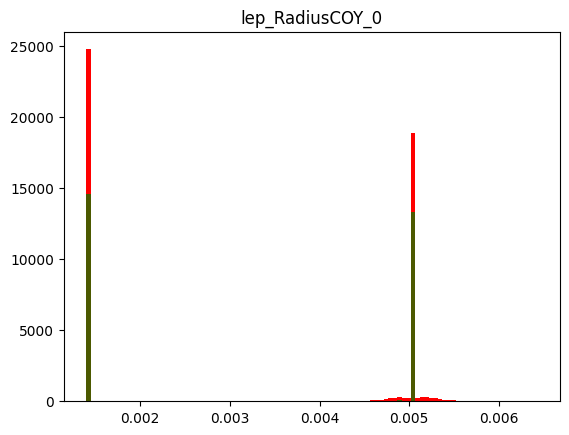

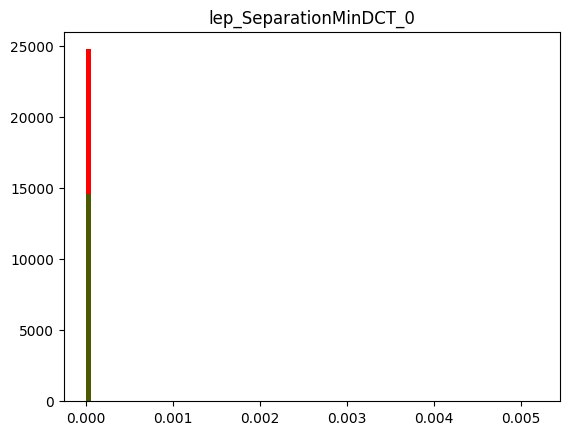

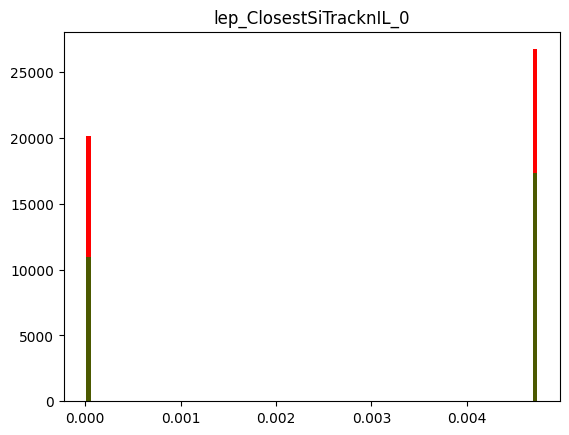

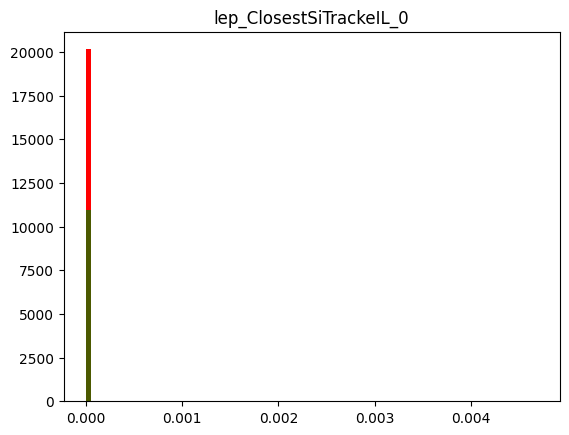

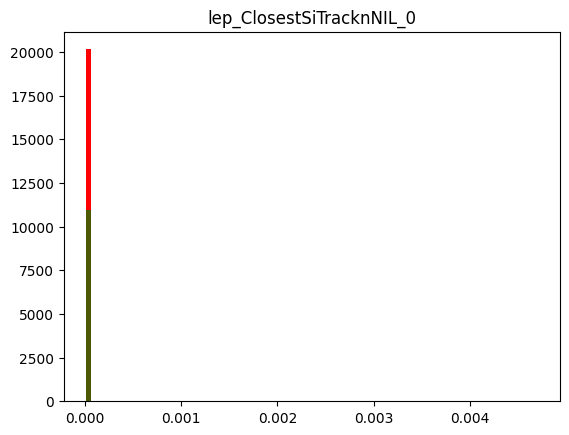

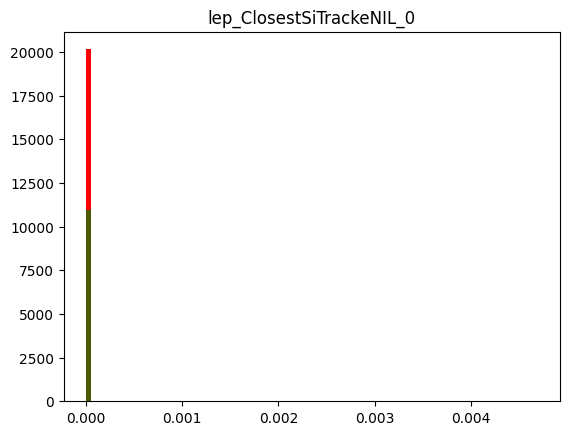

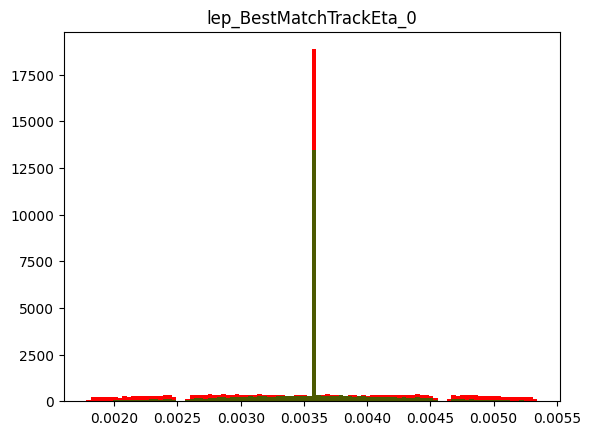

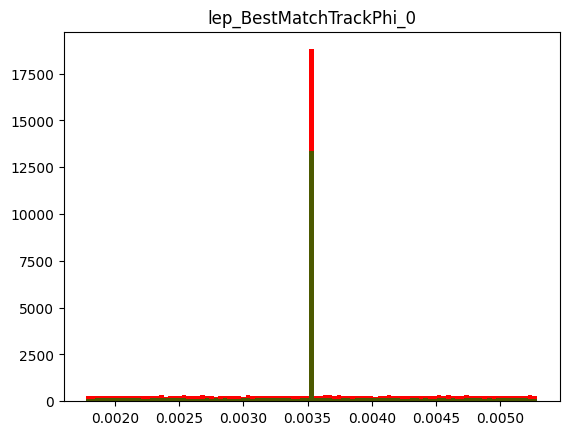

In [186]:
for i in range(0, 20):
    paint(keys[i], 100, background, signal, "red", "green", 0.7)

In [26]:
combined_data['lep_vz_0']

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [28]:
combined_data['taus_DL1r_0']

array([-0.00201005, -0.00201005, -0.00201005, ..., -0.00201005,
       -0.00201005, -0.00201005], dtype=float32)

In [27]:
globals_min

{'jet_pt': 0.5028664,
 'jet_eta': 0.3333255,
 'jet_phi': 0.33332583,
 'jet_e': 0.501946,
 'lep_Pt_0': 0.50006306,
 'lep_E_0': 0.5000095,
 'lep_Eta_0': 0.33335674,
 'lep_Phi_0': 0.3333429,
 'lep_EtaBE2_0': 0.333319,
 'lep_sigd0PV_0': 0.33336735,
 'lep_Z0SinTheta_0': 0.47150606,
 'lep_d0_0': 0.64331234,
 'lep_z0_0': 0.3776684,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.57464975,
 'lep_RadiusCO_0': 0.24121885,
 'lep_RadiusCOX_0': 0.22022577,
 'lep_RadiusCOY_0': 0.21749033,
 'lep_SeparationMinDCT_0': 0.000986952,
 'lep_ClosestSiTracknIL_0': 0.001994018,
 'lep_ClosestSiTrackeIL_0': 0.000999001,
 'lep_ClosestSiTracknNIL_0': 0.0029850747,
 'lep_ClosestSiTrackeNIL_0': 0.000999001,
 'lep_BestMatchTrackEta_0': 0.33270687,
 'lep_BestMatchTrackPhi_0': 0.33334008,
 'lep_BestMatchTrackD0_0': 0.61594856,
 'lep_BestMatchTrackZ0_0': 0.35097268,
 'lep_BestMatchTrackQ_0': 0.33333334,
 'lep_ClosestSiTrackEta_0': 0.0025635234,
 'lep_ClosestSiTrackD0_0': 0.020290533,
 'lep_ClosestSiTrackZ0_0': 0.12853768,
 'lep_

In [28]:
globals_max

{'jet_pt': 0.5950596,
 'jet_eta': 1.0,
 'jet_phi': 1.0,
 'jet_e': 0.6423531,
 'lep_Pt_0': 1.0,
 'lep_E_0': 1.0,
 'lep_Eta_0': 1.0,
 'lep_Phi_0': 1.0,
 'lep_EtaBE2_0': 1.0,
 'lep_sigd0PV_0': 1.0,
 'lep_Z0SinTheta_0': 0.8621603,
 'lep_d0_0': 0.68306327,
 'lep_z0_0': 0.9212938,
 'lep_vz_0': 0.0,
 'lep_deltaz0_0': 0.79405785,
 'lep_RadiusCO_0': 1.0,
 'lep_RadiusCOX_0': 1.0,
 'lep_RadiusCOY_0': 1.0,
 'lep_SeparationMinDCT_0': 1.0,
 'lep_ClosestSiTracknIL_0': 1.0,
 'lep_ClosestSiTrackeIL_0': 1.0,
 'lep_ClosestSiTracknNIL_0': 1.0,
 'lep_ClosestSiTrackeNIL_0': 1.0,
 'lep_BestMatchTrackEta_0': 1.0,
 'lep_BestMatchTrackPhi_0': 1.0,
 'lep_BestMatchTrackD0_0': 0.6777674,
 'lep_BestMatchTrackZ0_0': 0.94327337,
 'lep_BestMatchTrackQ_0': 1.0,
 'lep_ClosestSiTrackEta_0': 1.0,
 'lep_ClosestSiTrackD0_0': 1.0,
 'lep_ClosestSiTrackZ0_0': 1.0,
 'lep_ClosestSiTrackQ_0': 1.0,
 'lep_chargeIDBDTLoose_0': 1.0,
 'lep_ID_1': 1.0,
 'lep_Pt_1': 0.59640545,
 'lep_E_1': 0.62143403,
 'lep_Eta_1': 1.0,
 'lep_Phi_1': 1.

In [27]:
from matplotlib.backends.backend_pdf import PdfPages

In [33]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
pp = PdfPages('plots3.pdf')
for i in keys[201:]:
    fig = paint(i, 100, combined_data[i])
    plt.savefig(pp, format='pdf')
pp.close()

In [170]:
np.save("signal_data.npy", signal)
np.save("background_data.npy", background)
np.save("combined_data.npy", combined_data)